In [1]:
import os
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Cell 0: Common imports for reading CSVs and processing/visualizing data
%matplotlib inline
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt


# scikit-learn helpers commonly used in data processing

# sensible defaults for plotting and display
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = 50
pd.options.display.max_rows = 200

In [2]:
def read_csv_file(filepath, sep=",", encoding="utf-8", usecols=None, parse_dates=None,
                  na_values=None, dtype=None, nrows=None, verbose=False, **kwargs):
    """
    Read a CSV into a pandas DataFrame with sensible defaults and path checking.

    Parameters:
    - filepath: str or Path-like
    - sep: field delimiter (default ',')
    - encoding: file encoding (default 'utf-8')
    - usecols: list-like or callable, columns to read
    - parse_dates: list-like or dict, columns to parse as dates
    - na_values: additional strings to recognize as NA
    - dtype: dict of column dtypes
    - nrows: int, number of rows to read
    - verbose: if True, display shape and head
    - **kwargs: passed to pd.read_csv

    Returns:
    - pd.DataFrame
    """
    path = Path(filepath).expanduser()
    if not path.exists():
        raise FileNotFoundError(f"CSV file not found: {path}")

    try:
        df = pd.read_csv(path, sep=sep, encoding=encoding, usecols=usecols,
                         parse_dates=parse_dates, na_values=na_values,
                         dtype=dtype, nrows=nrows, **kwargs)
    except Exception as e:
        raise RuntimeError(f"Failed to read CSV {path}: {e}")

    if verbose:
        print(f"Loaded {path} -> shape: {df.shape}")
        display(df.head())

    return df

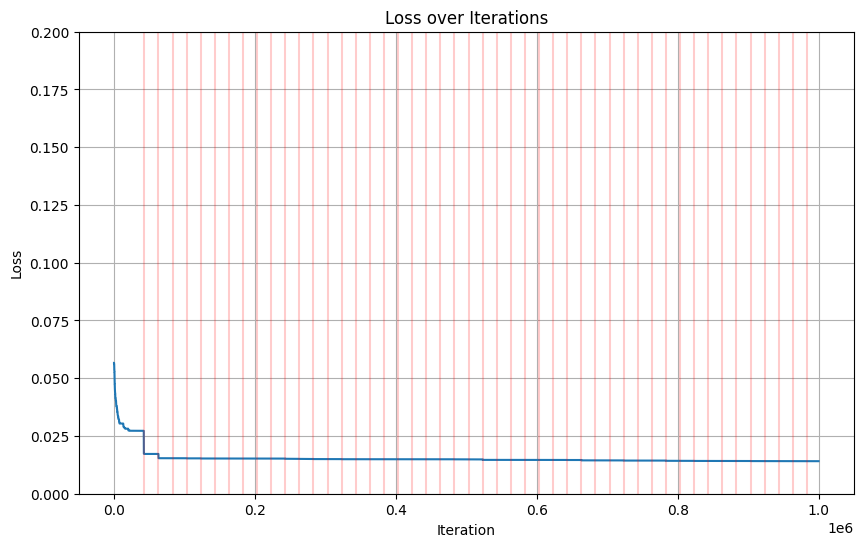

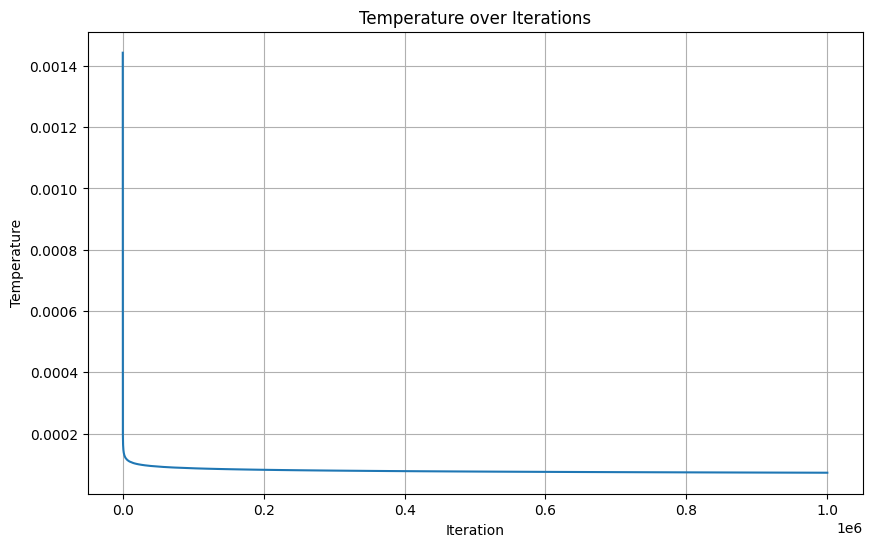

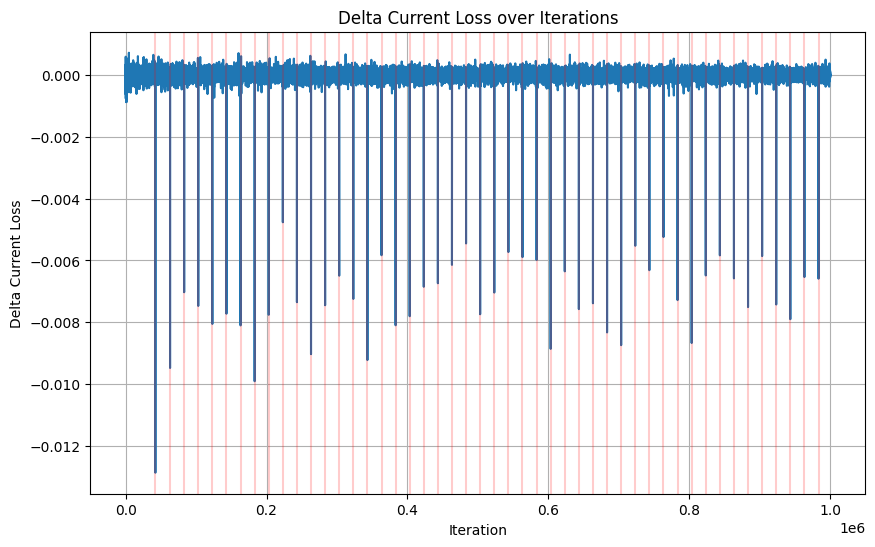

np.float64(791691.9375)

In [3]:
df = read_csv_file("output/logs/bach/200/2025-11-09 03:15:17.csv")

max_loss = df['Temperature'][0]
X = df[['Iteration']].values
y = df[['Best Global Loss']]

plt.plot(X, y)

# Vertical line at iteration with Stagnated = True
stagnated_iters = df.index[df['Stagnated'] == True].tolist()
for it in stagnated_iters:
    plt.axvline(x=df['Iteration'][it], color='red', linestyle='-', alpha=0.2 )
    

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.ylim(0, 0.2)
plt.show()

y = df['Temperature']

# Fill inf values if any
y = y.replace([np.inf, -np.inf], np.nan).fillna(method='ffill')

plt.plot(X, y)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Temperature over Iterations')
plt.grid(True)
plt.show()

delta = df['Current Loss'].values[1:] - df['Current Loss'].values[:-1]
plt.plot(X[1:], delta)

stagnated_iters = df.index[df['Stagnated'] == True].tolist()
for it in stagnated_iters:
    plt.axvline(x=df['Iteration'][it], color='red', linestyle='-', alpha=0.2 )

plt.xlabel('Iteration')
plt.ylabel('Delta Current Loss')
plt.title('Delta Current Loss over Iterations')
plt.grid(True)
plt.show()

minTimes = df[df['minimizeColorError time'] > 0]['minimizeColorError time']
np.mean(minTimes)

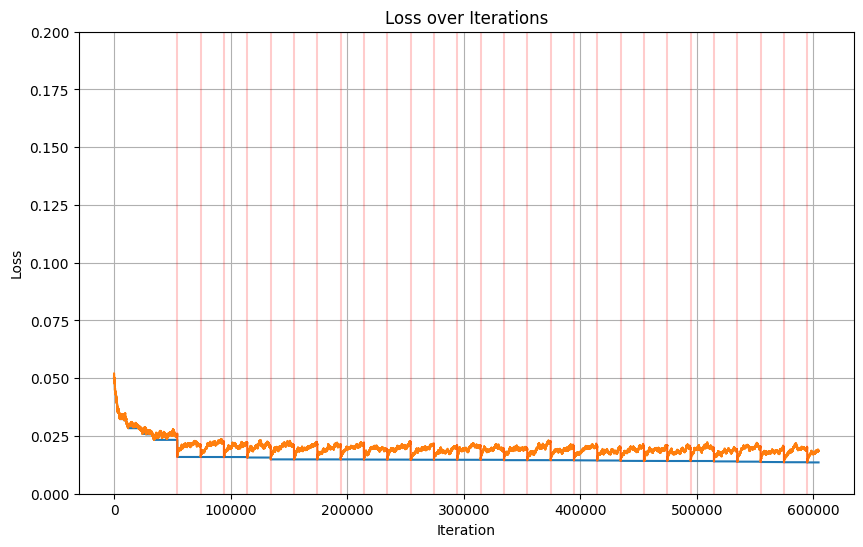

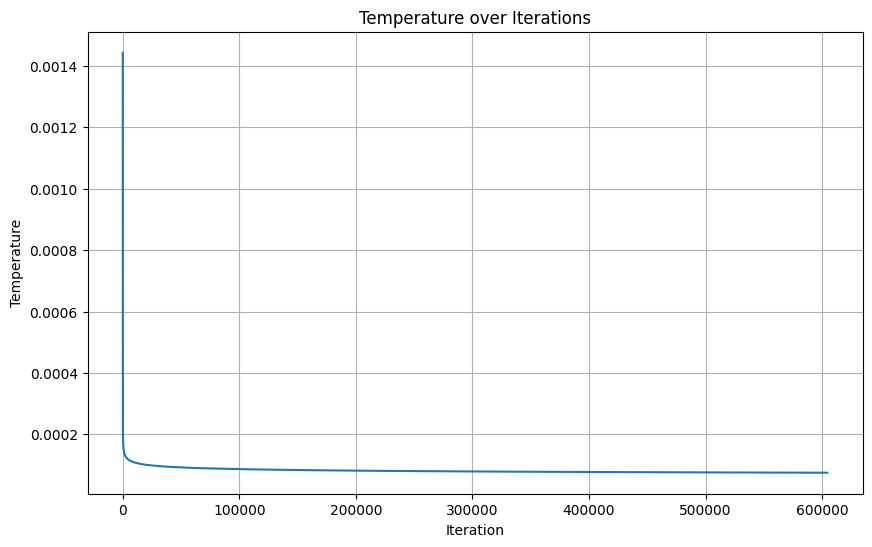

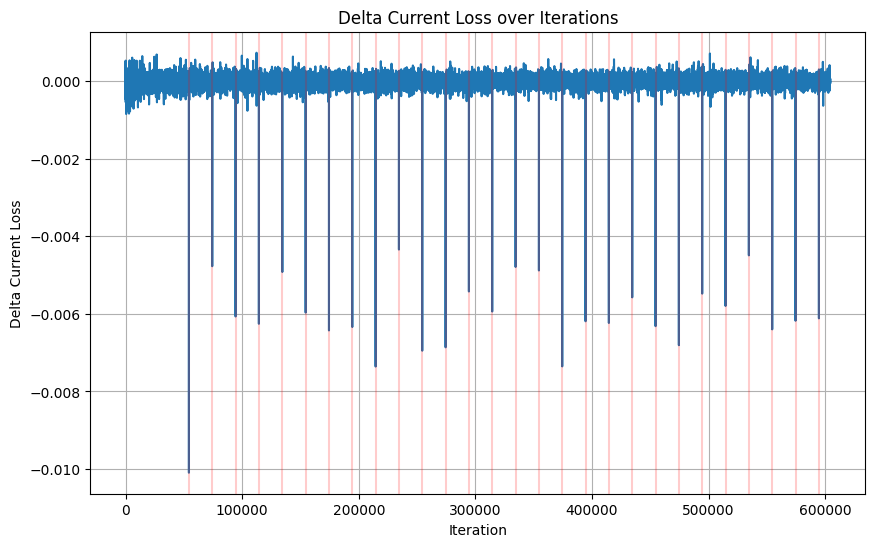

np.float64(36072.0)

In [4]:
df = read_csv_file("output/logs/bach/200/2025-11-10 12:50:54.csv")

max_loss = df['Temperature'][0]
X = df[['Iteration']].values
y = df[['Best Global Loss']]

plt.plot(X, y)
y = df[['Current Loss']]
plt.plot(X, y)

# Vertical line at iteration with Stagnated = True
stagnated_iters = df.index[df['Stagnated'] == True].tolist()
for it in stagnated_iters:
    plt.axvline(x=df['Iteration'][it], color='red', linestyle='-', alpha=0.2 )
    

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.ylim(0, 0.2)
plt.show()

y = df['Temperature']

# Fill inf values if any
y = y.replace([np.inf, -np.inf], np.nan).fillna(method='ffill')

plt.plot(X, y)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Temperature over Iterations')
plt.grid(True)
plt.show()

delta = df['Current Loss'].values[1:] - df['Current Loss'].values[:-1]
plt.plot(X[1:], delta)

stagnated_iters = df.index[df['Stagnated'] == True].tolist()
for it in stagnated_iters:
    plt.axvline(x=df['Iteration'][it], color='red', linestyle='-', alpha=0.2 )

plt.xlabel('Iteration')
plt.ylabel('Delta Current Loss')
plt.title('Delta Current Loss over Iterations')
plt.grid(True)
plt.show()

minTimes = df[df['minimizeColorError time'] > 0]['minimizeColorError time']
np.mean(minTimes)

In [5]:
from pathlib import Path

import matplotlib.pyplot as plt

def show_before_after(path):
    """
    Display two images side-by-side:
      - {path}_initialGuess.png
      - {path}_finalResult.png

    Parameters:
    - path: str or Path (without the trailing suffix)
    Returns:
    - (fig, (ax_left, ax_right))
    """
    p1 = Path(f"{path} initialGuess.png")
    p2 = Path(f"{path}_finalResult.png")

    if not p1.exists():
        raise FileNotFoundError(f"Image not found: {p1}")
    if not p2.exists():
        raise FileNotFoundError(f"Image not found: {p2}")

    img1 = plt.imread(p1)
    img2 = plt.imread(p2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    for ax, img, title in ((ax1, img1, "Initial Guess"), (ax2, img2, "Final Result")):
        cmap = "gray" if img.ndim == 2 else None
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
    return fig, (ax1, ax2)

def show_before_after_difference(path):
    '''
    Display three images side-by-side:
      - {path}_initialGuess.png
      - {path}_finalResult.png
      - Difference image between the two
    '''
    p1 = Path(f"{path} initialGuess.png")
    p2 = Path(f"{path}_finalResult.png")

    if not p1.exists():
        raise FileNotFoundError(f"Image not found: {p1}")
    if not p2.exists():
        raise FileNotFoundError(f"Image not found: {p2}")

    img1 = plt.imread(p1)
    img2 = plt.imread(p2)

    diff_img = np.abs(img1 - img2)
    diff_img = np.mean(diff_img, axis=2)
    
    # diff_img = (diff_img - diff_img.min()) / (diff_img.max() - diff_img.min())
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    for ax, img, title in ((ax1, img1, "Initial Guess"),
                            (ax2, img2, "Final Result"),
                            (ax3, diff_img, "Difference")):
          cmap = "gray" if img.ndim == 2 else None
          ax.imshow(img, cmap=cmap)
          ax.set_title(title)
          ax.axis("off")
    plt.tight_layout()
    plt.show()
    return fig, (ax1, ax2, ax3)

In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

def show_comparison(path, original_path):
    """
    Muestra tres imágenes lado a lado:
      - {path}_initialGuess.png
      - {path}_finalResult.png
      - Imagen original: instancias/{pintura}.png
    """
    p_initial = Path(f"{path} initialGuess.png")
    p_final = Path(f"{path}_finalResult.png")
    p_original = Path(original_path)

    if not p_final.exists():
        return
    if not p_original.exists():
        raise FileNotFoundError(f"No se encontró imagen original: {p_original}")

    img_initial = plt.imread(p_initial)
    img_original = plt.imread(p_original)
    img_final = plt.imread(p_final) if p_final.exists() else None

    fig, axes = plt.subplots(1, 3, figsize=(14, 14))
    imgs_titles = [
        (img_initial, "Initial Guess"),
        (img_final, "Final Result" if img_final is not None else "Final Result (no disponible)"),
        (img_original, "Original"),
    ]

    for ax, (img, title) in zip(axes, imgs_titles):
        if img is not None:
            cmap = "gray" if img.ndim == 2 else None
            ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
    return fig, axes


def process_all_results(base_dir="output/images", instances_dir="instancias"):
    """
    Recorre automáticamente las carpetas de resultados con estructura:
    output/images/{pintura}/{n_pinceladas}/{fecha}_...

    Busca pares initialGuess/finalResult y llama a show_comparison para cada uno.
    Si solo existe el initialGuess, igual se muestra junto a la imagen original.
    """
    base_dir = Path(base_dir)
    print(base_dir.iterdir())
    for painting_dir in base_dir.iterdir():
        if not painting_dir.is_dir():
            continue
        original_path = Path(instances_dir) / f"{painting_dir.name}.png"
        for strokes_dir in painting_dir.iterdir():
            if not strokes_dir.is_dir():
                continue
            for result_img in strokes_dir.iterdir():
                if (result_img.name.endswith("finalResult.png")):
                    continue
                
                print(result_img)
                base_result_name = " ".join(result_img.name.split(" ")[:2])
                result_path = strokes_dir / base_result_name
                print(result_path)
                print(original_path)

                show_comparison(result_path, original_path)
                print()
            print()


output/images/mondriaan/3/2025-11-08 23:19:59 initialGuess.png
output/images/mondriaan/3/2025-11-08 23:19:59
instancias/mondriaan.png

output/images/mondriaan/3/2025-11-08 23:58:15 initialGuess.png
output/images/mondriaan/3/2025-11-08 23:58:15
instancias/mondriaan.png


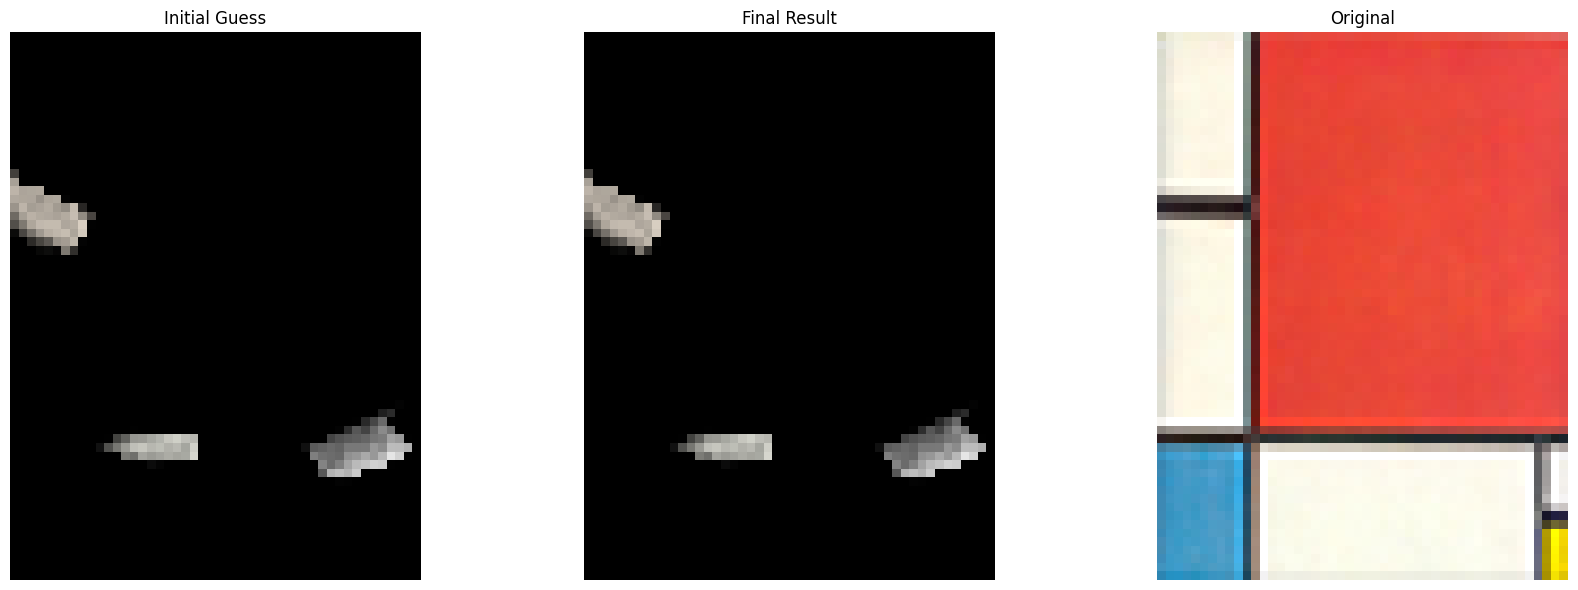


output/images/mondriaan/3/2025-11-09 01:49:05 initialGuess.png
output/images/mondriaan/3/2025-11-09 01:49:05
instancias/mondriaan.png


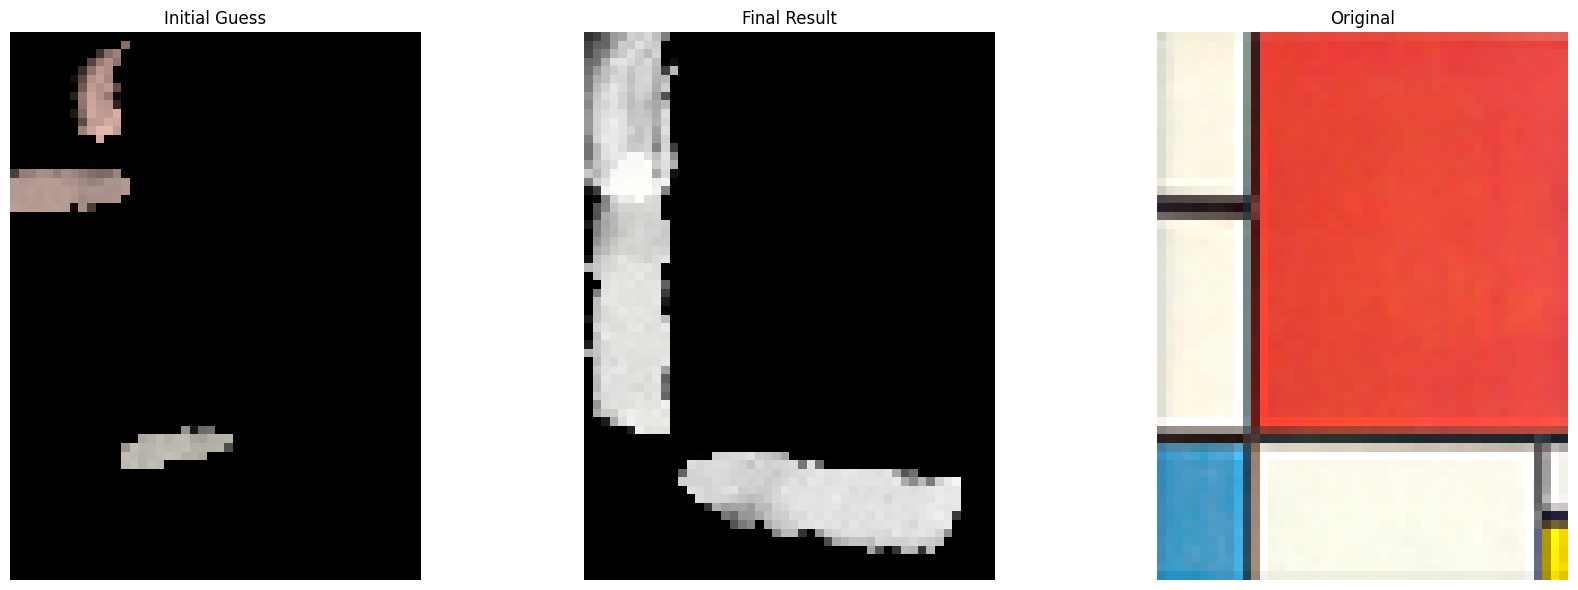



output/images/mondriaan/125/2025-11-08 23:21:08 initialGuess.png
output/images/mondriaan/125/2025-11-08 23:21:08
instancias/mondriaan.png

output/images/mondriaan/125/2025-11-08 23:24:58 initialGuess.png
output/images/mondriaan/125/2025-11-08 23:24:58
instancias/mondriaan.png

output/images/mondriaan/125/2025-11-08 23:28:51 initialGuess.png
output/images/mondriaan/125/2025-11-08 23:28:51
instancias/mondriaan.png


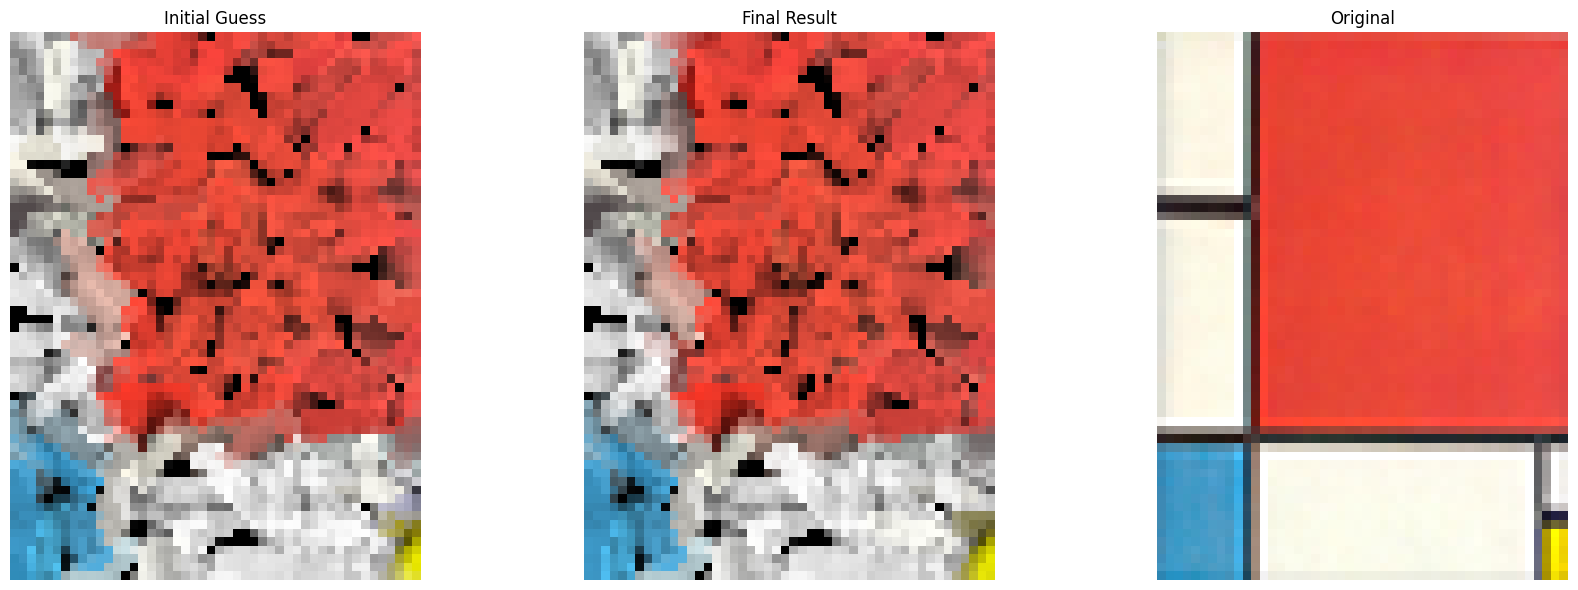


output/images/mondriaan/125/2025-11-09 00:37:08 initialGuess.png
output/images/mondriaan/125/2025-11-09 00:37:08
instancias/mondriaan.png

output/images/mondriaan/125/2025-11-09 00:39:00 initialGuess.png
output/images/mondriaan/125/2025-11-09 00:39:00
instancias/mondriaan.png

output/images/mondriaan/125/2025-11-09 00:41:05 initialGuess.png
output/images/mondriaan/125/2025-11-09 00:41:05
instancias/mondriaan.png

output/images/mondriaan/125/2025-11-09 01:10:12 initialGuess.png
output/images/mondriaan/125/2025-11-09 01:10:12
instancias/mondriaan.png

output/images/mondriaan/125/2025-11-09 01:11:30 initialGuess.png
output/images/mondriaan/125/2025-11-09 01:11:30
instancias/mondriaan.png

output/images/mondriaan/125/2025-11-09 01:15:21 initialGuess.png
output/images/mondriaan/125/2025-11-09 01:15:21
instancias/mondriaan.png

output/images/mondriaan/125/2025-11-09 01:17:03 initialGuess.png
output/images/mondriaan/125/2025-11-09 01:17:03
instancias/mondriaan.png


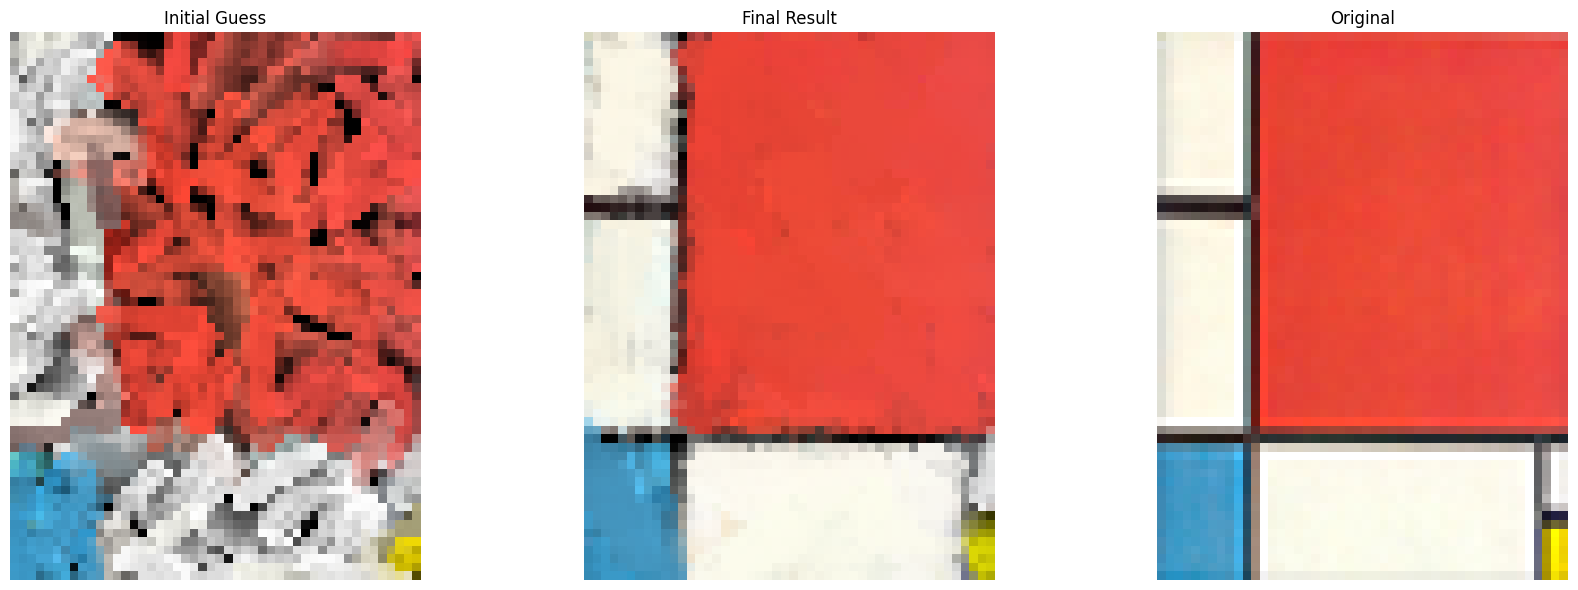



output/images/mondriaan/25/2025-11-09 00:00:50 initialGuess.png
output/images/mondriaan/25/2025-11-09 00:00:50
instancias/mondriaan.png


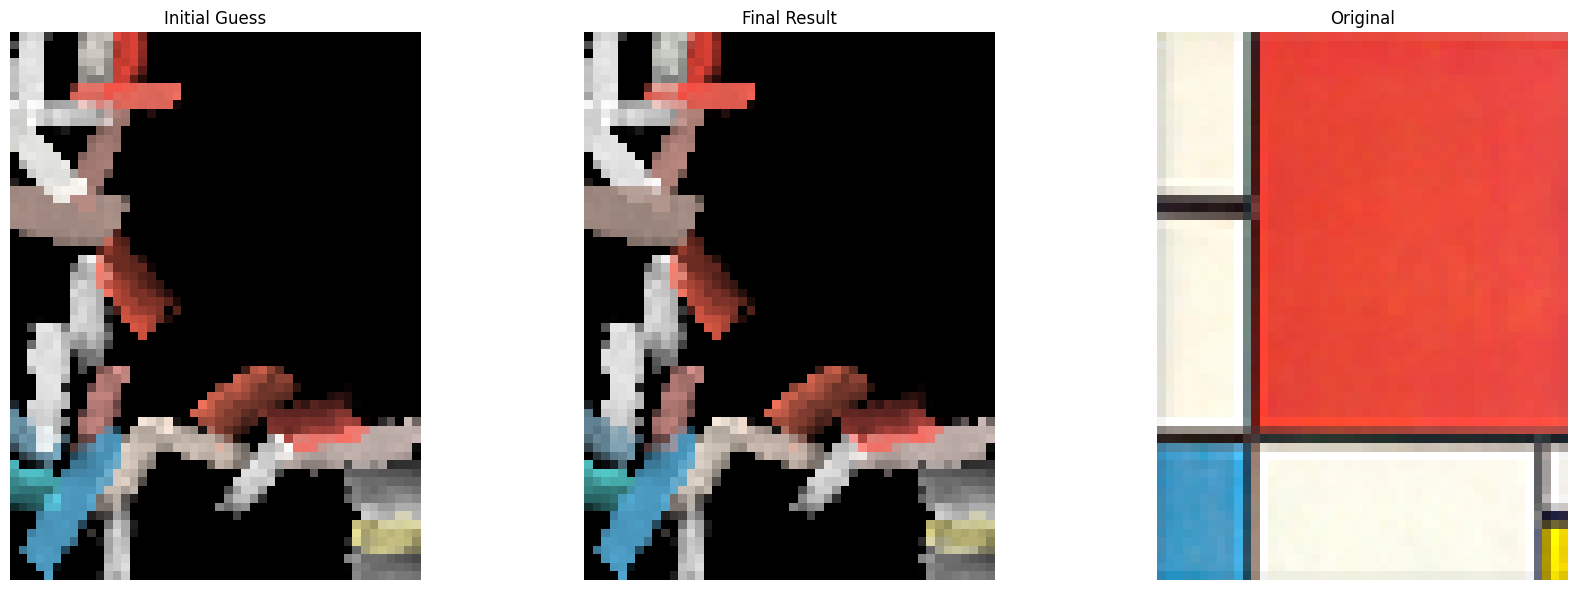


output/images/mondriaan/25/2025-11-09 01:52:22 initialGuess.png
output/images/mondriaan/25/2025-11-09 01:52:22
instancias/mondriaan.png


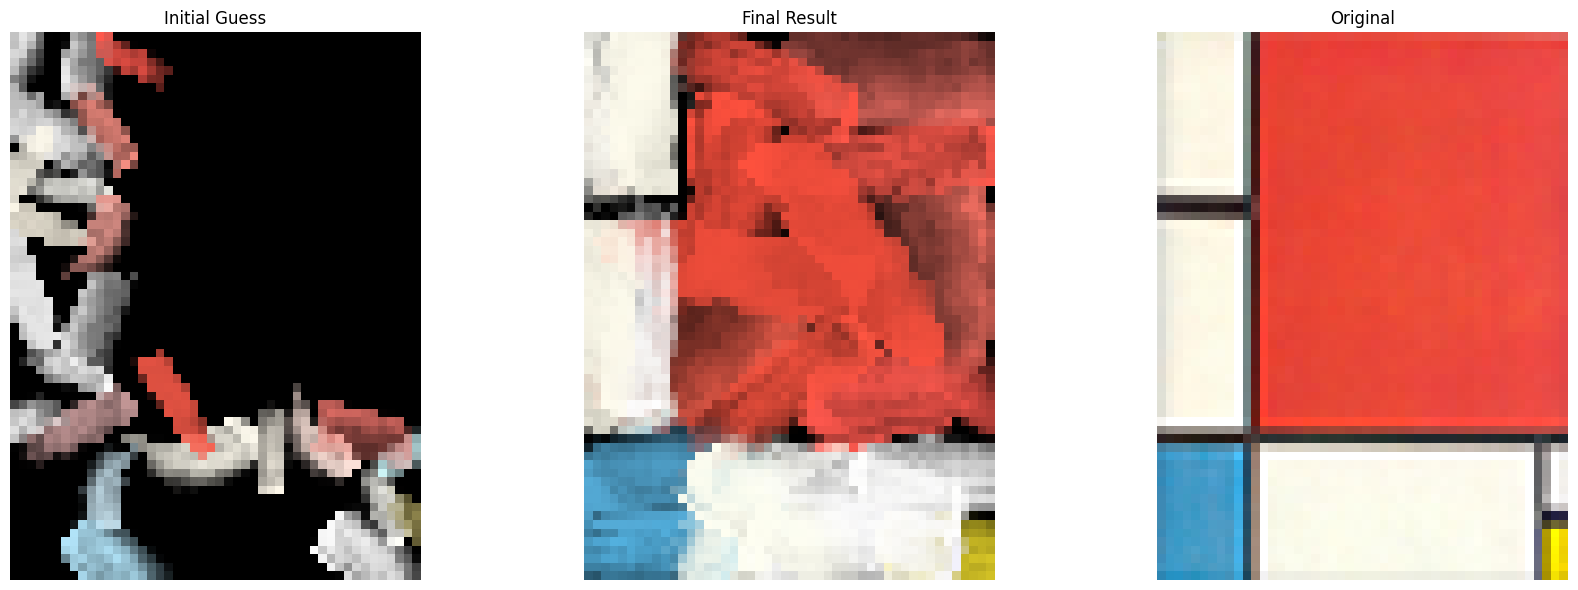


output/images/mondriaan/25/2025-11-09 11:10:36 initialGuess.png
output/images/mondriaan/25/2025-11-09 11:10:36
instancias/mondriaan.png


output/images/mondriaan/75/2025-11-09 00:08:18 initialGuess.png
output/images/mondriaan/75/2025-11-09 00:08:18
instancias/mondriaan.png


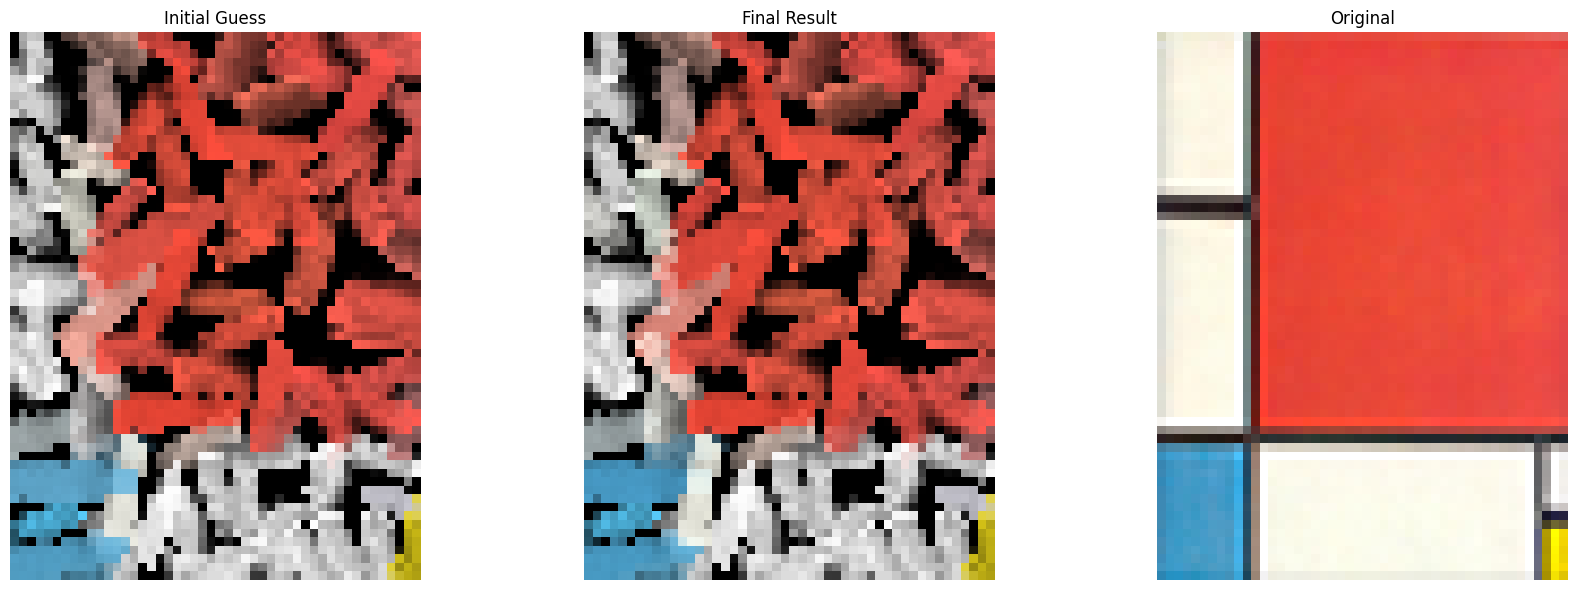


output/images/mondriaan/75/2025-11-09 02:01:30 initialGuess.png
output/images/mondriaan/75/2025-11-09 02:01:30
instancias/mondriaan.png


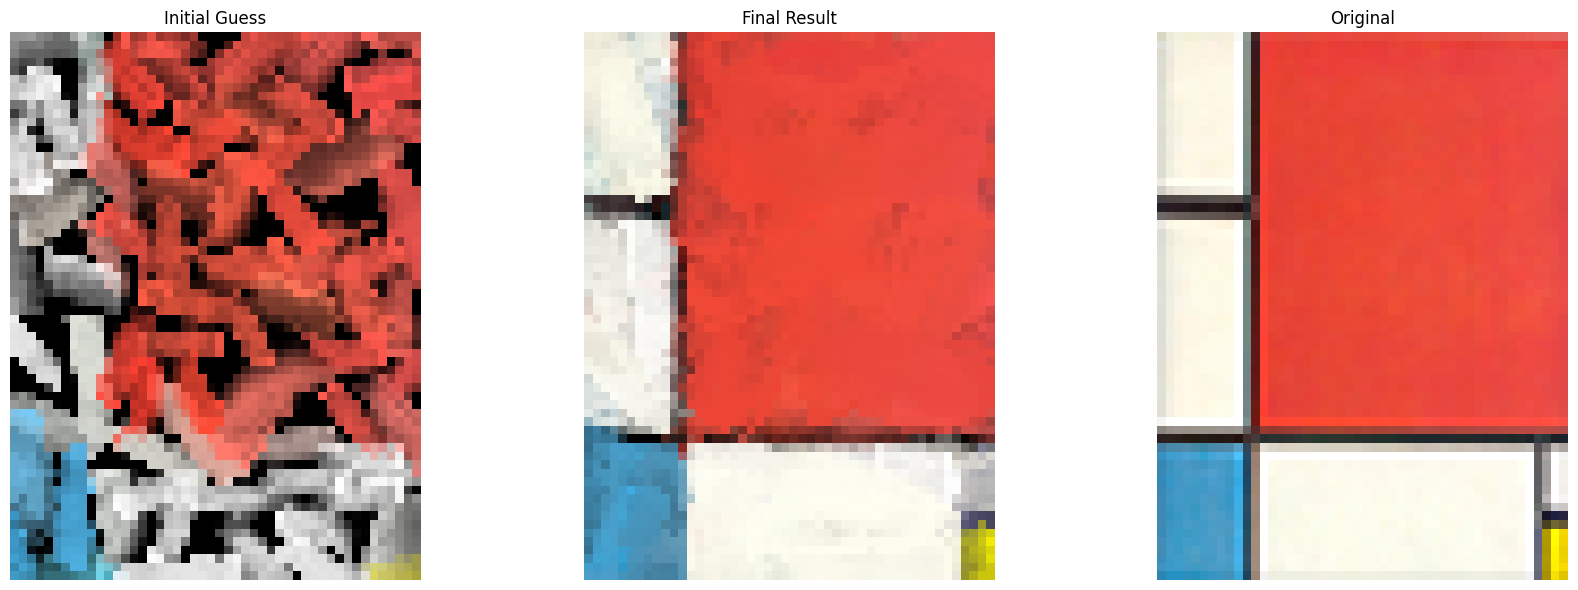



output/images/mondriaan/200/2025-11-09 00:26:48 initialGuess.png
output/images/mondriaan/200/2025-11-09 00:26:48
instancias/mondriaan.png

output/images/mondriaan/200/2025-11-09 02:22:27 initialGuess.png
output/images/mondriaan/200/2025-11-09 02:22:27
instancias/mondriaan.png


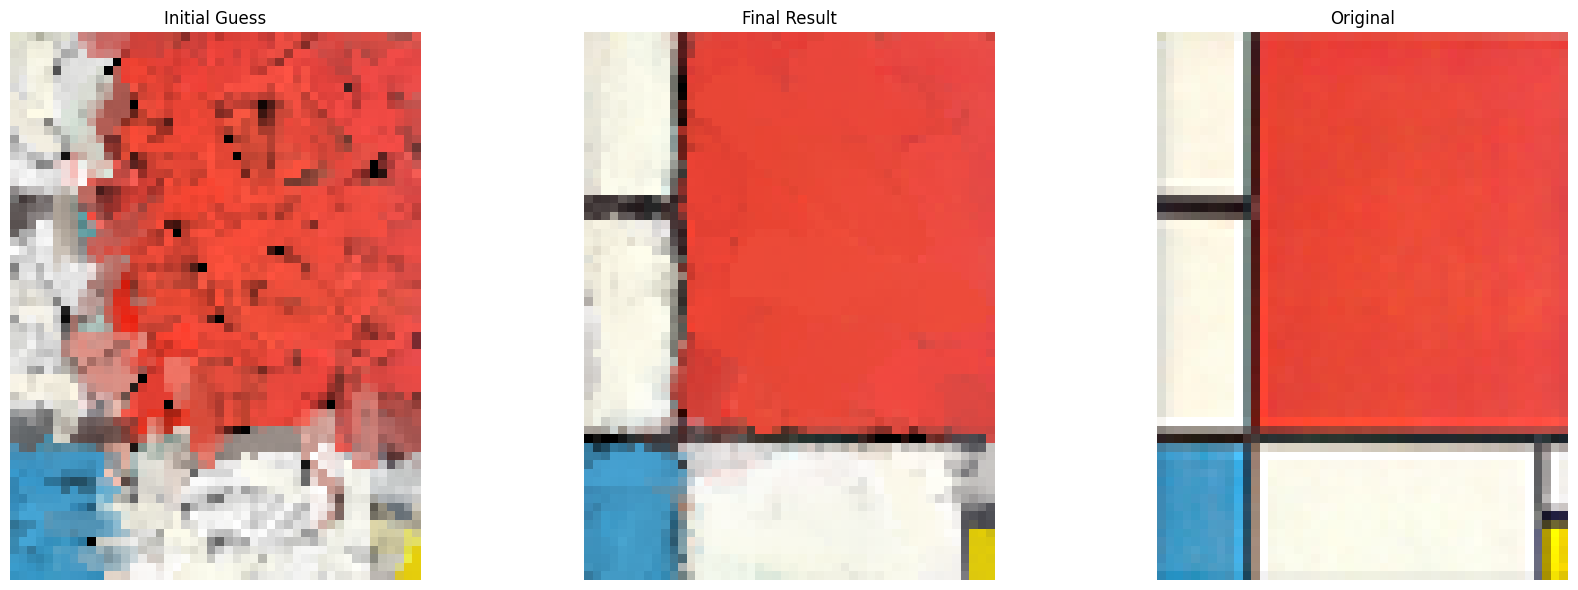



output/images/mondriaan/250/2025-11-09 03:10:50 initialGuess.png
output/images/mondriaan/250/2025-11-09 03:10:50
instancias/mondriaan.png

output/images/mondriaan/250/2025-11-09 08:02:42 initialGuess.png
output/images/mondriaan/250/2025-11-09 08:02:42
instancias/mondriaan.png


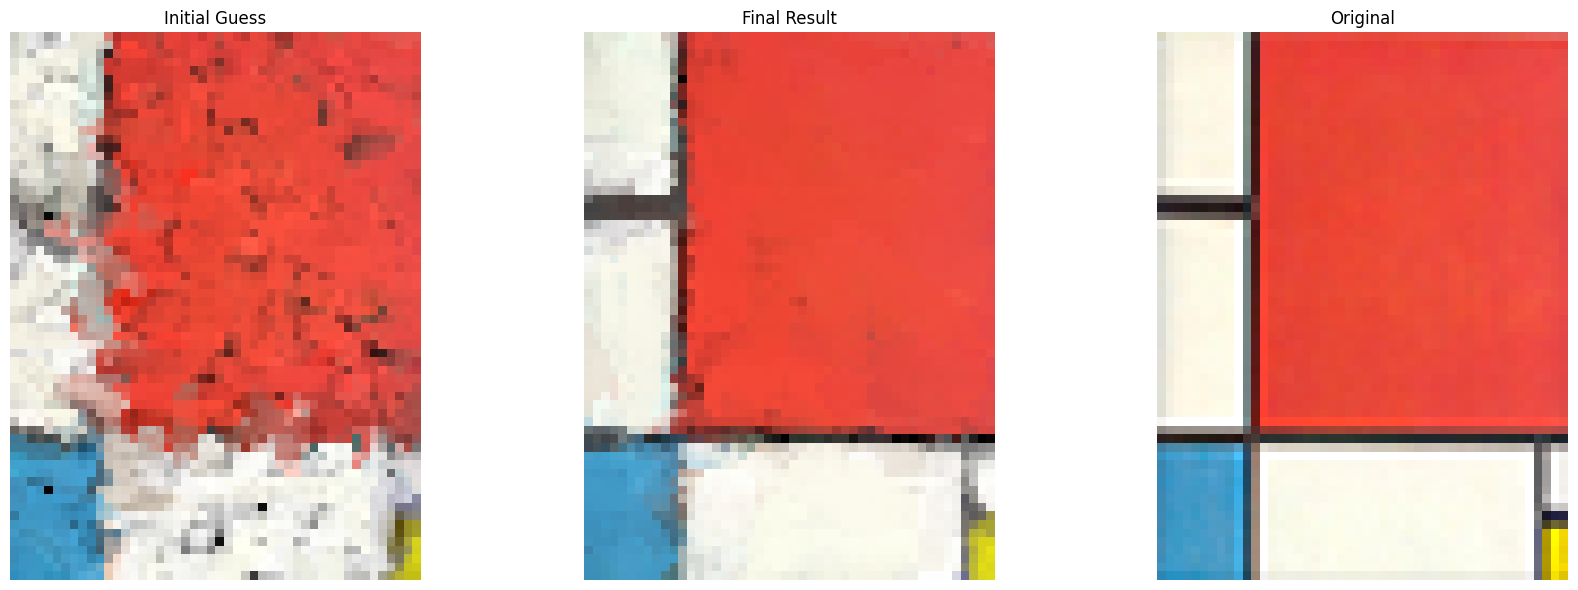



output/images/bach/200/2025-11-09 03:15:17 initialGuess.png
output/images/bach/200/2025-11-09 03:15:17
instancias/bach.png


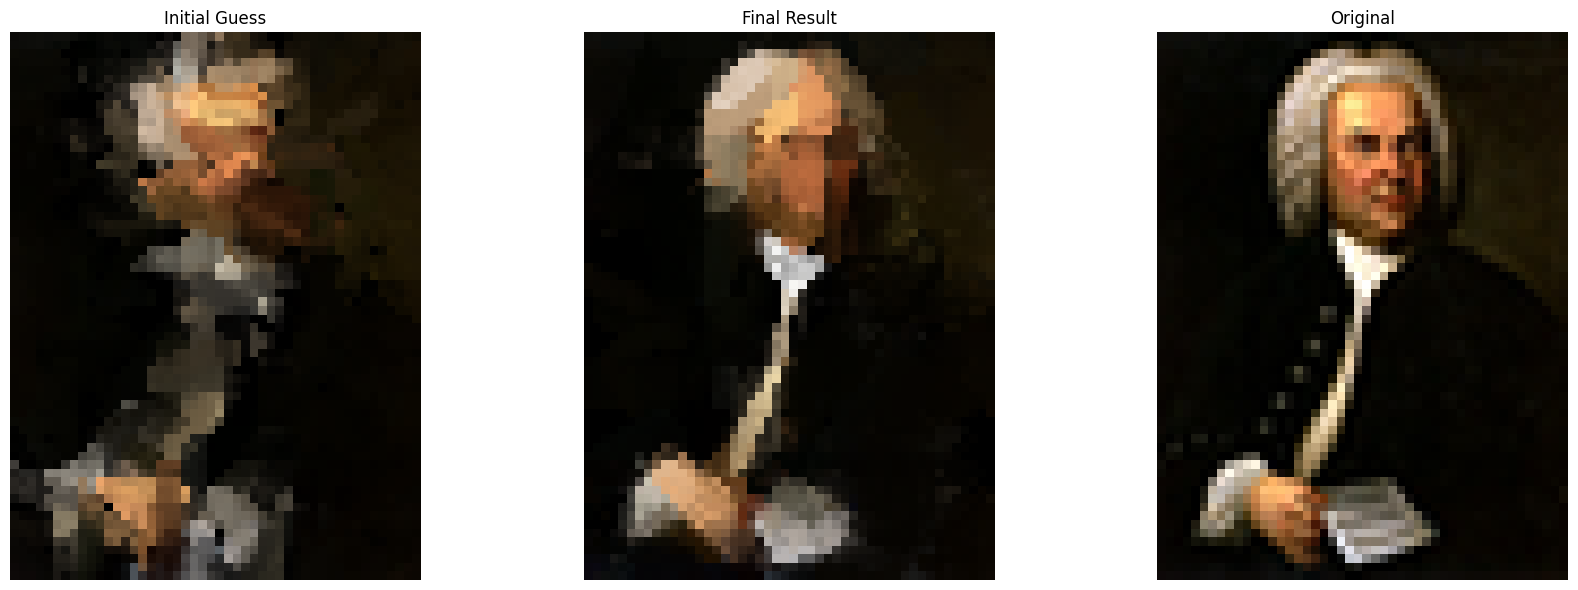


output/images/bach/200/2025-11-10 12:49:47 initialGuess.png
output/images/bach/200/2025-11-10 12:49:47
instancias/bach.png

output/images/bach/200/2025-11-10 12:50:54 initialGuess.png
output/images/bach/200/2025-11-10 12:50:54
instancias/bach.png


output/images/bach/250/2025-11-09 09:02:09 initialGuess.png
output/images/bach/250/2025-11-09 09:02:09
instancias/bach.png


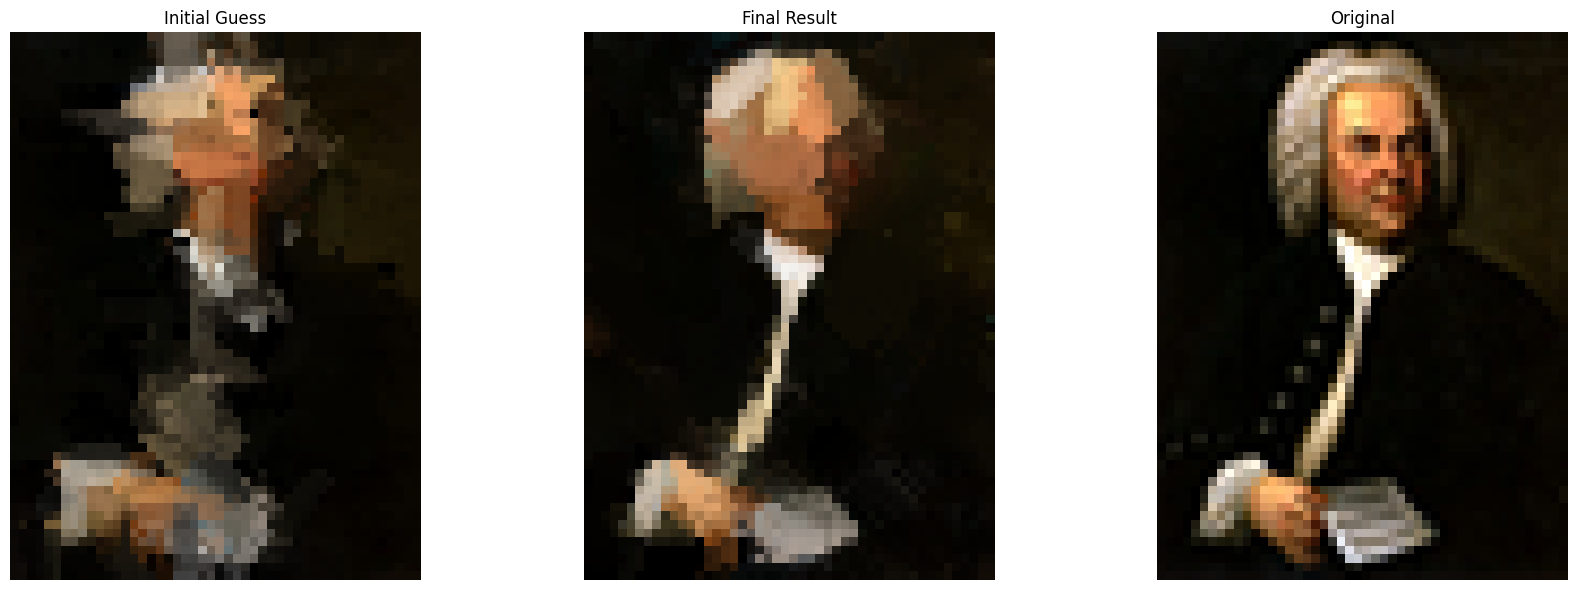



output/images/dali/200/2025-11-09 04:02:52 initialGuess.png
output/images/dali/200/2025-11-09 04:02:52
instancias/dali.png


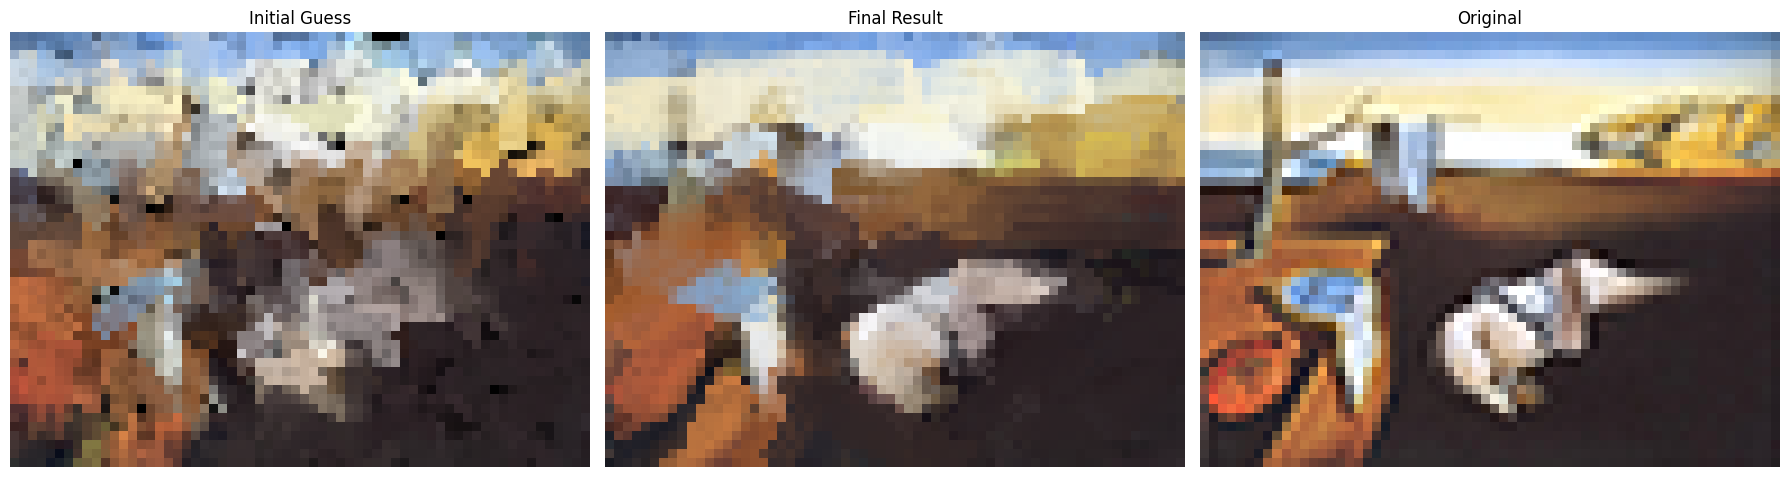



output/images/dali/250/2025-11-09 10:01:39 initialGuess.png
output/images/dali/250/2025-11-09 10:01:39
instancias/dali.png


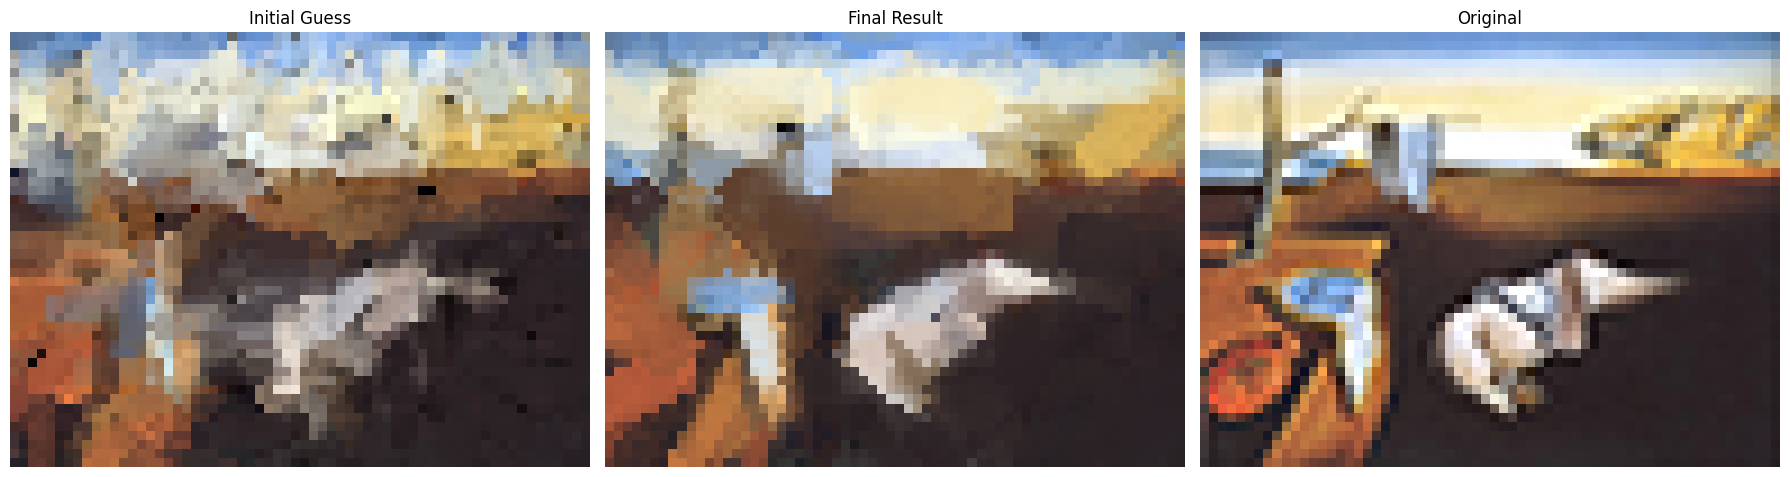



output/images/klimt/200/2025-11-09 04:51:03 initialGuess.png
output/images/klimt/200/2025-11-09 04:51:03
instancias/klimt.png


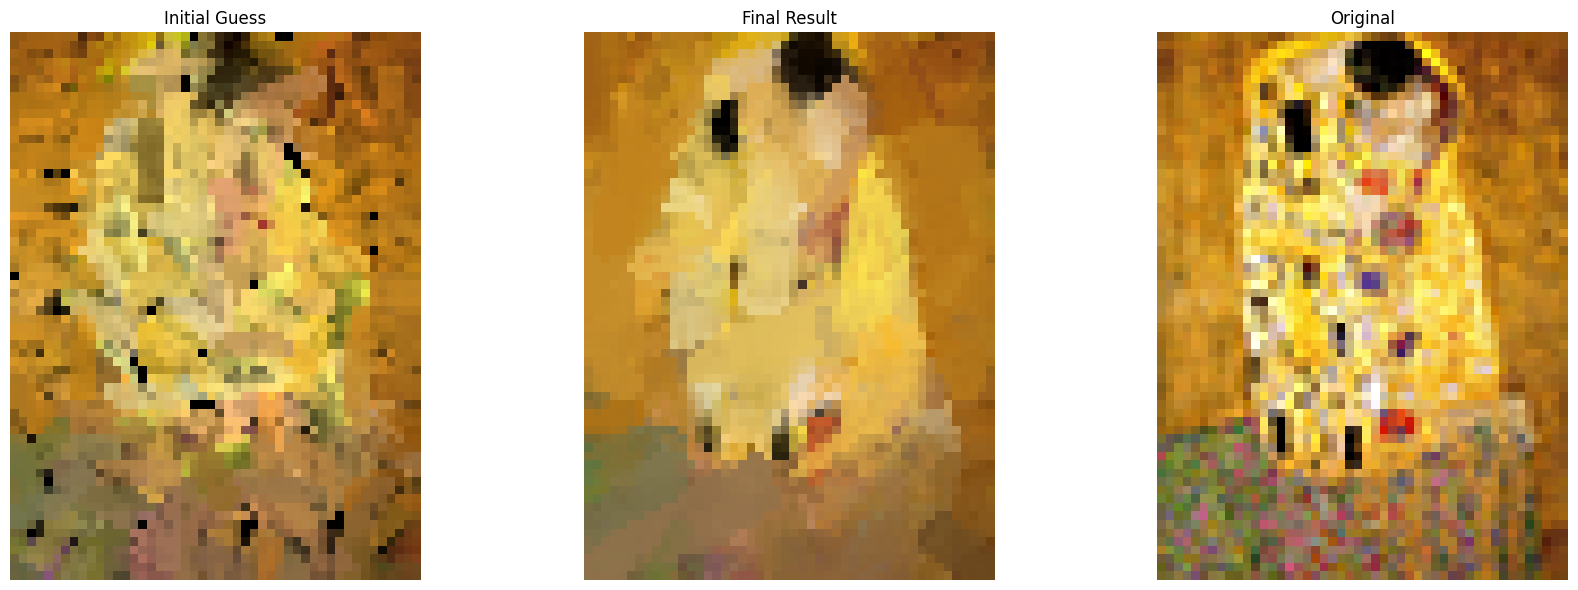



output/images/klimt/250/2025-11-09 11:01:27 initialGuess.png
output/images/klimt/250/2025-11-09 11:01:27
instancias/klimt.png


output/images/mona/200/2025-11-09 05:39:21 initialGuess.png
output/images/mona/200/2025-11-09 05:39:21
instancias/mona.png


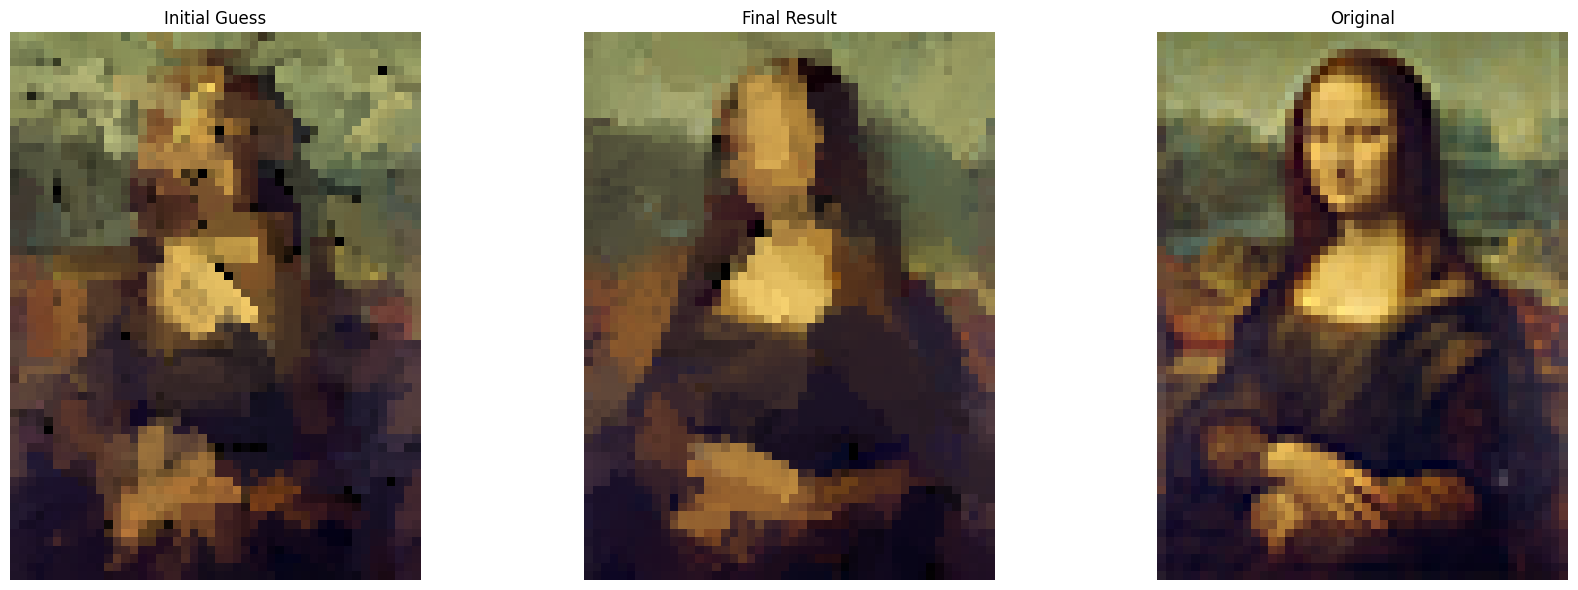



output/images/pollock/200/2025-11-09 06:26:55 initialGuess.png
output/images/pollock/200/2025-11-09 06:26:55
instancias/pollock.png


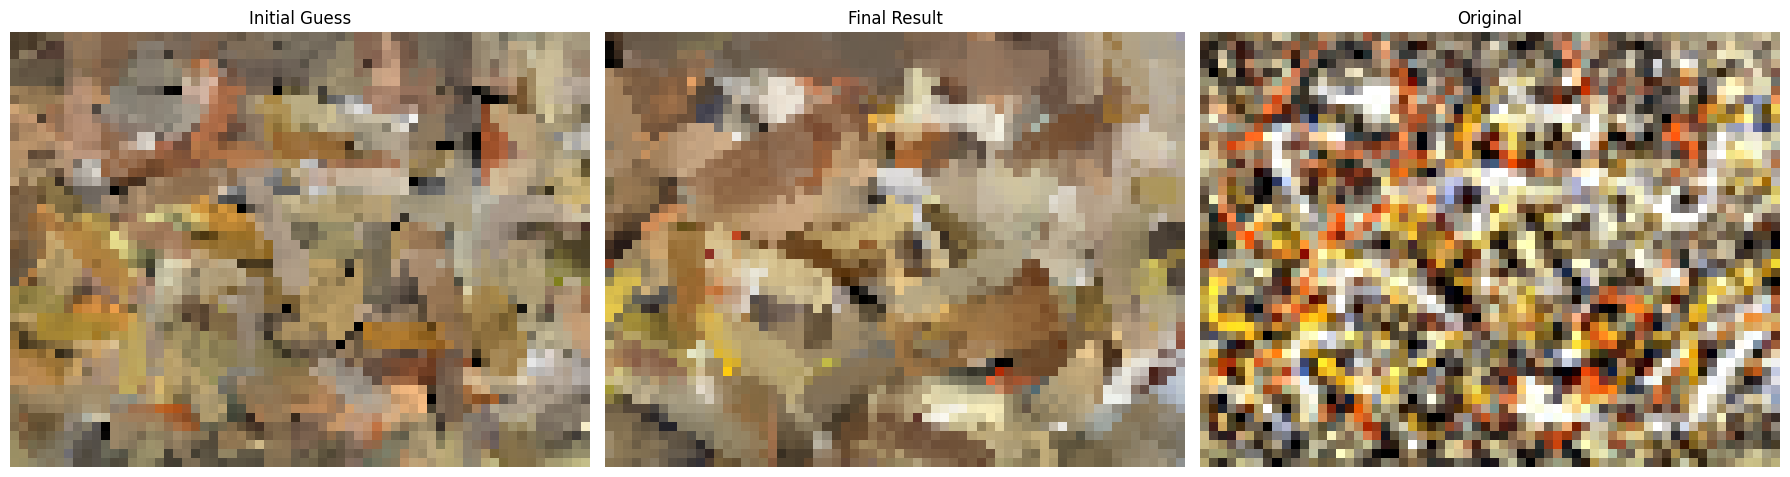



output/images/starrynight/200/2025-11-09 07:14:34 initialGuess.png
output/images/starrynight/200/2025-11-09 07:14:34
instancias/starrynight.png


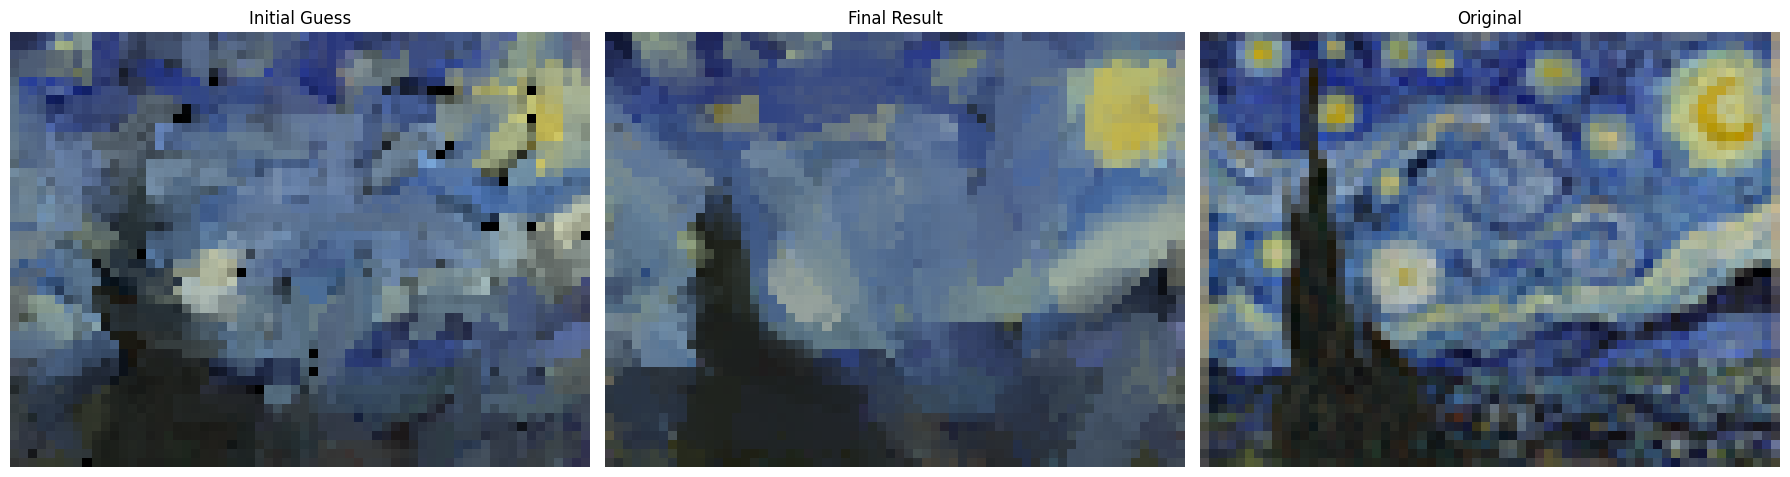

In [7]:
process_all_results()